In [8]:
# Write this line to import pandas & random package
import pandas

In [9]:
# load the dataset
data_frame = pandas.read_excel('./ann_dataset.xlsx')

In [10]:
# head() is used for showing first five rows
data_frame.head()

,DBI_8.30,WBI_8.30,DBII_14.20,WBII_14.20,Max Temp,Min Temp,RHI_8.30,RHII_14.20,WS,BSS,Rain,Evp
0,10.4,8.2,18.6,11.4,22.8,8,52,41,2.9,9.6,0,5.1
1,12.2,4,20.4,12,20.8,7.9,21,36,1.3,9.7,0,4.1
2,11.3,3.4,19.6,10.4,21.8,8.9,18,29,1.4,10,0,4.8
3,13.4,4.6,18.4,10.4,20.7,7.9,19,35,1.4,9.6,0,3.4
4,12,4.6,19.2,11.4,19.4,7.9,27,38,1.6,9.7,0,6.6


In [48]:
data_frame

,DBI_8.30,WBI_8.30,DBII_14.20,WBII_14.20,Max Temp,Min Temp,RHI_8.30,RHII_14.20,WS,BSS,Rain,Evp
0,10.4,8.2,18.6,11.4,22.8,8.0,52.0,41.0,2.9,9.6,0.0,5.1
1,12.2,4.0,20.4,12.0,20.8,7.9,21.0,36.0,1.3,9.7,0.0,4.1
2,11.3,3.4,19.6,10.4,21.8,8.9,18.0,29.0,1.4,10.0,0.0,4.8
3,13.4,4.6,18.4,10.4,20.7,7.9,19.0,35.0,1.4,9.6,0.0,3.4
4,12.0,4.6,19.2,11.4,19.4,7.9,27.0,38.0,1.6,9.7,0.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
7300,8.8,7.6,15.6,14.5,18.6,5.7,84.0,89.0,7.6,9.8,0.0,1.7
7301,7.2,4.6,15.0,6.7,17.1,6.3,68.0,26.0,11.6,10.3,0.0,3.9
7302,9.3,8.9,17.2,13.9,16.8,4.9,96.0,70.0,10.0,9.4,0.0,4.9
7303,12.1,12.0,16.5,13.9,18.9,10.2,99.0,77.0,10.0,9.0,0.0,1.8


In [54]:
tmp = data_frame

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       7295, 7296, 7297, 7298, 7299, 7300, 7301, 7302, 7303, 7304],
      dtype='int64', length=6240)

In [12]:
data_frame = data_frame.applymap(lambda x: pandas.to_numeric(x, errors='coerce')).dropna()

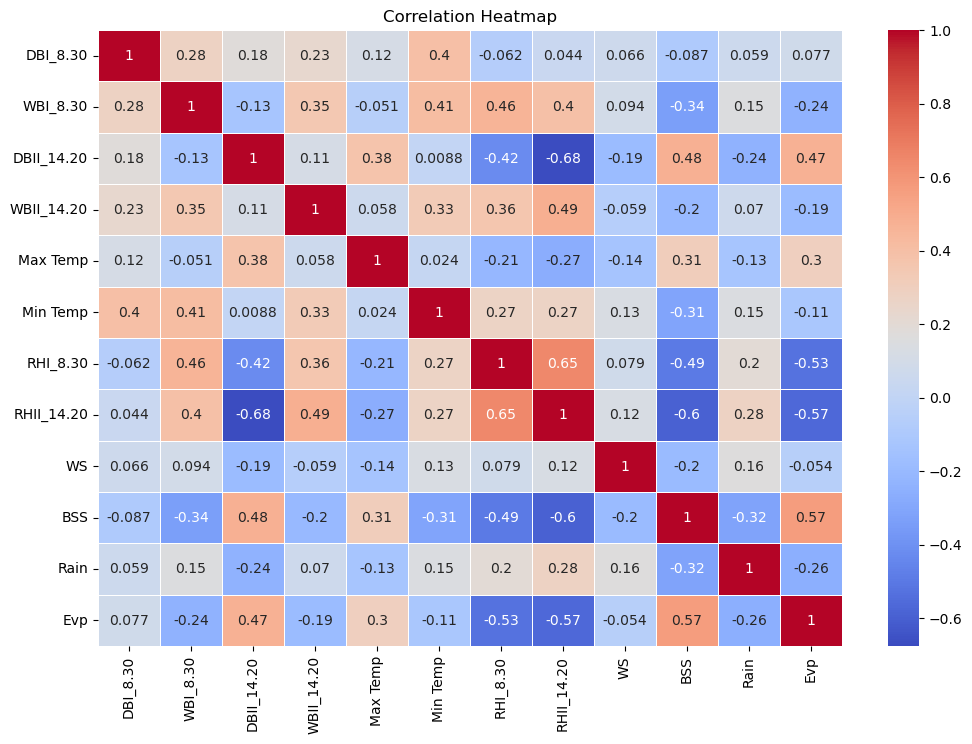

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data_frame.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
# separate input and output variables
X = data_frame.drop(['Evp'],axis=1)
y = data_frame['Evp']

In [42]:
# We separated the inputs & outputs, X has inputs
X
tmp = X

In [16]:
# y has outputs
y

0       5.1
1       4.1
2       4.8
3       3.4
4       6.6
       ... 
7300    1.7
7301    3.9
7302    4.9
7303    1.8
7304    1.2
Name: Evp, Length: 6240, dtype: float64

In [17]:
#  We perform scaling of data

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X = scaler.fit_transform(X)
X

array([[-0.70464601, -0.56872572,  0.51133317, ..., -0.58368638,
         0.86625551, -0.34349187],
       [-0.12916128, -1.53002669,  1.25833117, ..., -0.88068026,
         0.89333793, -0.34349187],
       [-0.41690364, -1.6673554 ,  0.92633206, ..., -0.86211814,
         0.97458519, -0.34349187],
       ...,
       [-1.05633113, -0.4085089 , -0.06966528, ...,  0.73422396,
         0.81209067, -0.34349187],
       [-0.16113265,  0.30102277, -0.3601645 , ...,  0.73422396,
         0.70376099, -0.34349187],
       [-0.51281777, -0.06518712,  0.34533361, ..., -0.00826074,
        -1.57116229, -0.34349187]])

In [18]:
# Split the data in test and train set

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Length of training data we have split

len(X_train)

4992

In [20]:
# Length of testing data we have split

len(X_test)

1248

In [21]:
# Show training data after transformation
X_train

array([[ 0.6381517 ,  0.62145643,  1.92232939, ...,  0.21448467,
         1.21832697, -0.34349187],
       [-0.32098952, -1.1638168 ,  2.2543285 , ..., -0.49087579,
        -0.05454677, -0.34349187],
       [ 1.08575094,  0.52990395,  0.84333228, ..., -1.0291772 ,
        -0.13579403, -0.34349187],
       ...,
       [ 0.09463834, -1.69024352, -1.14866239, ..., -0.23100615,
        -1.16492599, -0.34349187],
       [ 0.22252384,  0.48412772,  0.42833339, ...,  1.08690419,
        -1.19200841, -0.25631704],
       [-0.32098952,  0.2094703 , -1.23166217, ...,  0.40010585,
        -1.73365681, -0.33259501]])

In [22]:
# Show training expected outputs, these are used to
# validate the model output in each epoch
y_train

1603    3.0
4091    5.2
507     5.3
1424    1.3
2653    5.9
       ... 
4369    2.3
6181    3.7
6236    1.5
6422    1.1
914     0.7
Name: Evp, Length: 4992, dtype: float64

In [23]:
# Show testing data after transformation
X_test

array([[-6.52185291e-02,  3.46799007e-01, -6.96652783e-02, ...,
        -7.69307553e-01, -3.81931563e-04,  1.92305362e+00],
       [-1.27578080e-03,  3.01022771e-01,  4.69833278e-01, ...,
         1.95922555e-01, -1.35794031e-01, -1.03761094e-01],
       [ 6.26669675e-02,  3.69687125e-01, -5.67663945e-01, ...,
        -9.36366610e-01,  5.95431307e-01,  1.23655186e+00],
       ...,
       [ 4.46323458e-01, -1.56739594e-01, -1.52665056e-01, ...,
        -8.80680258e-01, -1.67949197e+00, -3.43491867e-01],
       [-1.29161277e-01,  3.01022771e-01, -1.81266061e+00, ...,
         1.03121784e+00, -1.46283261e+00,  5.71843810e-01],
       [ 5.74208954e-01,  7.58785136e-01,  5.11333167e-01, ...,
        -6.76496966e-01,  3.51689528e-01,  2.33713405e+00]])

In [24]:
pandas.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.065219,0.346799,-0.069665,1.312958,0.647920,0.245952,0.794444,1.220513,-0.769308,-0.000382,1.923054
1,-0.001276,0.301023,0.469833,0.036832,-0.123987,0.512898,0.574230,-0.387784,0.195923,-0.135794,-0.103761
2,0.062667,0.369687,-0.567664,0.256854,-0.260206,-0.354677,0.618273,0.700182,-0.936367,0.595431,1.236552
3,-0.512818,0.072142,0.677333,-0.183189,0.103045,-0.087731,0.882529,-0.766207,-0.472314,-0.569113,-0.343492
4,-0.512818,-0.362733,0.594333,0.124841,-0.373721,-0.321309,0.001673,-0.482390,0.195923,1.137080,-0.343492
...,...,...,...,...,...,...,...,...,...,...,...
1243,-0.384932,0.072142,-0.982663,-0.447215,-0.214799,0.179216,0.662315,0.416365,-0.620811,-1.489915,-0.343492
1244,-0.257047,0.186582,0.179334,0.168845,0.420889,-0.287941,0.750401,-0.103967,-0.787870,-0.108712,-0.343492
1245,0.446323,-0.156740,-0.152665,-0.271198,-0.487237,-0.020994,-0.835140,-0.198573,-0.880680,-1.679492,-0.343492
1246,-0.129161,0.301023,-1.812661,-0.447215,-0.736972,0.479530,0.794444,1.315119,1.031218,-1.462833,0.571844


In [25]:
y_test

3823    1.5
1894    2.6
5098    0.8
805     3.4
4996    2.2
       ... 
1445    1.9
2489    2.4
650     1.6
1293    1.6
1363    4.9
Name: Evp, Length: 1248, dtype: float64

In [26]:
# tensorflow package keras is used to develop ANNs
import keras

In [73]:
# we create model for the ANN
model = keras.Sequential([
    keras.layers.Dense(11, activation=keras.activations.relu, input_dim=X.shape[1]),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(20, activation=keras.activations.relu),
    keras.layers.Dense(8, activation=keras.activations.relu),
    keras.layers.Dense(1)
])

In [75]:
# model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.000001), metrics=['mae'])

In [76]:
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, batch_size=32, epochs=1500, validation_data=(X_test, y_test), callbacks=[keras.callbacks.EarlyStopping(patience=100)])

Epoch 1/1500
156/156 [==============================] - 1s 3ms/step - loss: 12.4619 - mae: 2.9124 - val_loss: 12.7687 - val_mae: 2.9860
Epoch 2/1500
156/156 [==============================] - 0s 2ms/step - loss: 12.4186 - mae: 2.9066 - val_loss: 12.7247 - val_mae: 2.9801
Epoch 3/1500
156/156 [==============================] - 0s 2ms/step - loss: 12.3755 - mae: 2.9009 - val_loss: 12.6805 - val_mae: 2.9742
Epoch 4/1500
156/156 [==============================] - 0s 2ms/step - loss: 12.3322 - mae: 2.8951 - val_loss: 12.6364 - val_mae: 2.9683
Epoch 5/1500
156/156 [==============================] - 0s 2ms/step - loss: 12.2893 - mae: 2.8893 - val_loss: 12.5923 - val_mae: 2.9623
Epoch 6/1500
156/156 [==============================] - 0s 2ms/step - loss: 12.2462 - mae: 2.8835 - val_loss: 12.5482 - val_mae: 2.9563
Epoch 7/1500
156/156 [==============================] - 0s 2ms/step - loss: 12.2032 - mae: 2.8776 - val_loss: 12.5040 - val_mae: 2.9503
Epoch 8/1500
156/156 [==========================

In [77]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

39/39 [==============================] - 0s 1ms/step - loss: 2.3067 - mae: 1.1254
Mean Squared Error on Test Set: [2.3066835403442383, 1.12537682056427]


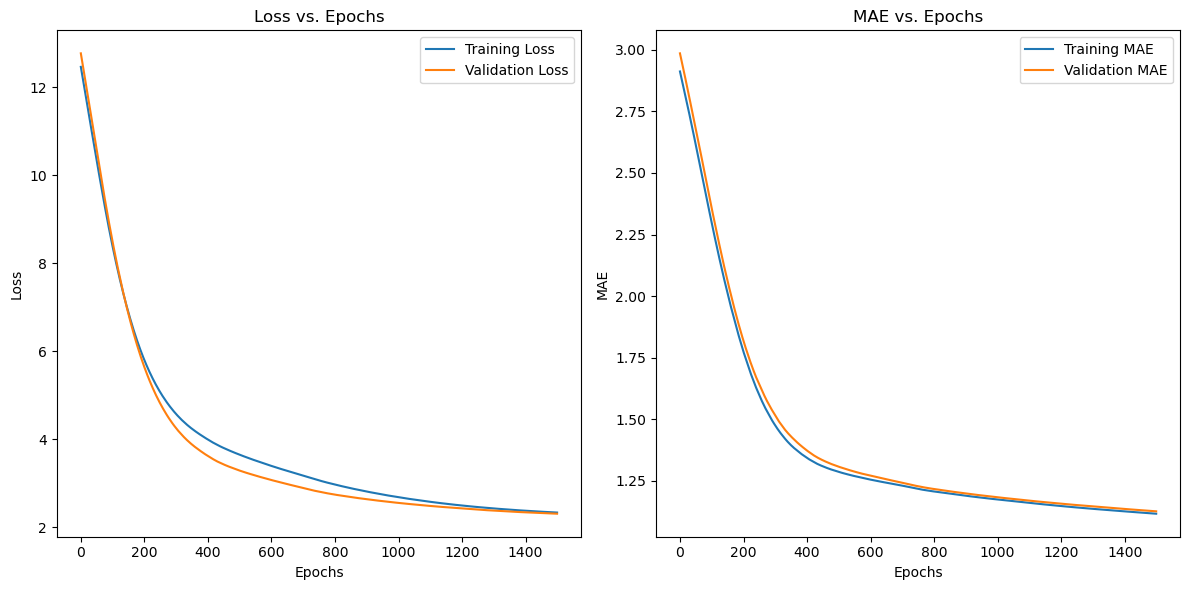

In [78]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('MAE vs. Epochs')

plt.tight_layout()
plt.show()

In [ ]:
# for layer in model.layers:
#   print(layer.get_config(), layer.get_weights())

In [80]:
# saving model for future use
model.save('my_model.h5')

In [14]:
import keras
# use previously saved mode
old_model = keras.models.load_model('my_model.h5')

# Show the model architecture
old_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 100)               1200      
                                                                 
 dense_9 (Dense)             (None, 20)                2020      
                                                                 
 dense_10 (Dense)            (None, 8)                 168       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,529
Trainable params: 3,529
Non-trainable params: 0
_________________________________________________________________


## Expected values for the below example is 2.8

In [21]:
# importing numpy
import numpy
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

new_data = pandas.read_csv('your_name')

# for index, row in new_data.iterrows():
# logic for reading data from csv file


# manual testing by providing input variables
single_row = [10.6,10.6,15.4,13.6,19.8,8.9,100,82,5,8.7,0,]

# performing scaling as we did on our training data
scaled_single_row = scaler.fit_transform(numpy.array(single_row).reshape(1, -1))

# predicting the output
predictions = old_model.predict(scaled_single_row)

# printing the predictions
predictions[0][0]

1/1 [==============================] - 0s 16ms/step


2.2872124